In [ ]:
!pip install pymssql
!pip install pyodbc

In [ ]:
import pandas as pd
import pymssql
import datetime as dt
import numpy as np

In [ ]:
# 1. Dataset Overview
# data set tên:
# 9 bảng
# 4/10/2016 - 17/10/2018
# đơn vị tiền đồng Real (R$) là đồng Đô La Brazil
# Olist - một trong các nền tảng market place lớn nhất của brazil (tương tự như shopee, tiki)
# Olist sẽ connect các doanh nghiệp nhỏ, cho các seller này đăng bán trên sàn ecom của họ, bán direct đến người dùng
# (1) Khách hàng mua từ Olist Store
# (2) Người bán được noti và hoàn thành order đó
# (3) Khách hàng sau khi nhận sản phẩm được ship đến hoặc hết ngày dự kiến giao hàng sẽ nhận được email khảo sát đánh giá review

In [ ]:
# 2. Data Preprocessing
# - check overview: columns, rows
# - check null, duplicated -------------> không có duplicated, có null nhưng là revieư không đáng kể
# - check datatype
# Process Data:
# - tạo DF: order, payment, product, category
# - tạo RFM

In [ ]:
# 3. Dataset analysis
# Business Overview
# Doanh số, đơn đặt hàng theo thời gian

In [ ]:
# Kết nối và đọc 9 bảng từ database
#1.df_customers
#2.df_geolocation
#3.order_items
#4.order_payments
#5.order_reviews
#6.orders
#7.product_category_name_translation
#8.dbo.products
#9.dbo.sellers

In [ ]:
# @title 1.df_customers
# 1.df_customers
# Connection information
server = '45.117.83.230'
port = 1433
username = 'Student1'
password = '@Mindxdream2023'
database = 'OLIST'

# Connect to the database
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)

try:
    # Query to select data
    query = "SELECT * FROM dbo.customers"

    # Execute the query and read the results into a Pandas DataFrame
    df_customers = pd.read_sql(query, connection)

finally:
    # Ensure to close the connection after finishing the work
    connection.close()

<ipython-input-160-231159becd32>:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [ ]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# each order is assigned to a unique customer_id. This means that the same customer
# will get different ids for different orders. The purpose of having a customer_unique_id on the
# dataset is to allow you to identify customers that made repurchases at the store. Otherwise you
# would find that each order had a different customer associated with.

In [ ]:
# Mỗi 1 khách có 1 customer_unique_id, khi tiến hành mỗi giao dịch sẽ được cấp customer_id tương ứng cho lần giao dịch đó (cart giỏ hàng đó)

In [ ]:
df_customers.duplicated(subset='customer_unique_id').sum()

3345

In [ ]:
df_customers.duplicated(subset='customer_id').sum()

0

In [ ]:
# @title 2.df_geolocation
#2.df_geolocation
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)
query = "SELECT * FROM dbo.geolocation"

df_geolocation = pd.read_sql(query, connection)
df_geolocation.head()

<ipython-input-166-2e825e46559f>:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
2,1041,sao paulo,SP
3,1035,sao paulo,SP
4,1012,sao paulo,SP


In [ ]:
# @title 3.df_order_items
#3.order_items
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)
query = "SELECT * FROM dbo.order_items"

df_order_items = pd.read_sql(query, connection)
df_order_items.head()

<ipython-input-167-763ee73250f4>:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,5890.0,1329.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,23990.0,1993.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,19900.0,1787.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,1299.0,1279.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,19990.0,1814.0


In [ ]:
# @title 4.df_order_payments
#4.order_payments
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)
query = "SELECT * FROM dbo.order_payments"

df_order_payments = pd.read_sql(query, connection)
df_order_payments.head()

<ipython-input-168-61a67b1d17bb>:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,9933.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,2439.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,6571.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,10778.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,12845.0


In [ ]:
# mỗi 1 order_id sẽ được chia thành nhiều payment (trả góp, trả theo thứ tự dần dần...)

In [ ]:
df_order_payments.duplicated(subset='order_id').sum()

4446

In [ ]:
# @title 5.df_order_reviews
#5.order_reviews
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)
query = "SELECT * FROM dbo.order_reviews"

df_order_reviews= pd.read_sql(query, connection)
df_order_reviews.head()

<ipython-input-171-9dc39a696a38>:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [ ]:
# @title 6.df_orders
#6.orders
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)
query = "SELECT * FROM dbo.orders"

df_orders = pd.read_sql(query, connection)
df_orders.head()

<ipython-input-172-8b9373e48e56>:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
# df_orders_customers.info()

In [ ]:
# df_orders_customers2 = df_orders_customers_items[df_orders_customers_items['order_status'].isin(['canceled','unavailable'])]
# df_orders_customers2.to_excel('df_orders_customers2.xlsx')


In [ ]:
# df_orders_customers2.info()



In [ ]:
# @title 7.df_category_trans
#7.product_category_name_translation
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)
query = "SELECT * FROM dbo.product_category_name_translation"

df_category_trans= pd.read_sql(query, connection)
df_category_trans.head()

<ipython-input-177-f5c9295b56cf>:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# @title 8.df_products
#8.dbo.products
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)
query = "SELECT * FROM dbo.products"

df_products= pd.read_sql(query, connection)
df_products.head()

<ipython-input-178-d91362d2102a>:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# @title 9.df_sellers
#9.dbo.sellers
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)
query = "SELECT * FROM dbo.sellers"

df_sellers= pd.read_sql(query, connection)
df_sellers.head()

<ipython-input-179-607d296ad8d0>:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Kiểm tra sơ lược dữ liệu**

In [ ]:
# read
# df.info()
# df.shape
# df.describe()
# df.isnull().sum()
# df.duplicated().sum()

# col_cat = df.columns[df.dtypes == object]
# df_cat = df.loc[:,col_cat]
# result =  df_cat.apply(lambda x: x.nunique())
# result

# print(df.columns)

#df_customers, df_geolocation, df_order_items, df_order_payments, df_order_reviews, df_orders, df_category_trans, df_products, df_sellers

In [ ]:

dfs = [df_customers, df_geolocation, df_order_items, df_order_payments, df_order_reviews, df_orders, df_category_trans, df_products, df_sellers]

for i, df in enumerate(dfs, start=1):
    print(f"DataFrame {i}:")

    print("Info:")
    print(df.info())

    print("\nDescription:")
    print(df.describe())

    print("\nNull Values:")
    print(df.isnull().sum())

    print("\nDuplicated Rows:")
    print(df.duplicated().sum())

    col_cat = df.columns[df.dtypes == object]
    df_cat = df.loc[:, col_cat]
    result = df_cat.apply(lambda x: x.nunique())
    print("\nUnique Values Count for Categorical Columns:")
    print(result)

    print("\nColumns:")
    print(df.columns)
    print("\n")
    print("-------------------------------------------------------------------------------")

DataFrame 1:
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Description:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Null Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
cust

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Chuẩn bị dữ liệu phân tích RFM**

In [ ]:
# Nối hai bảng df_orders và df_customers có quan hệ 1 - 1

In [ ]:
df_orders_customers = pd.merge(df_orders, df_customers, on="customer_id")
df_orders_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
dfs = [df_orders_customers,df_order_items]

for i, df in enumerate(dfs, start=1):
    print(f"DataFrame {i}:")

    print("Info:")
    print(df.info())

    print("\nDescription:")
    print(df.describe())

    print("\nNull Values:")
    print(df.isnull().sum())

    print("\nDuplicated Rows:")
    print(df.duplicated().sum())

    col_cat = df.columns[df.dtypes == object]
    df_cat = df.loc[:, col_cat]
    result = df_cat.apply(lambda x: x.nunique())
    print("\nUnique Values Count for Categorical Columns:")
    print(result)

    print("\nColumns:")
    print(df.columns)
    print("\n")
    print("-------------------------------------------------------------------------------")

DataFrame 1:
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 

In [ ]:
# Tiếp tục nối với df_order_items
# merge right vì muốn giữ 112650 rows (items đã bán)

In [ ]:

df_orders_customers_items = df_orders_customers.merge(df_order_items, on='order_id', how='right')
df_orders_customers_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,5890.0,1329.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,23990.0,1993.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,19900.0,1787.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,1299.0,1279.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,19990.0,1814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,65077.0,sao luis,MA,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,29999.0,4341.0
112646,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,81690.0,curitiba,PR,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,35000.0,3653.0
112647,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039.0,sao paulo,SP,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,9990.0,1695.0
112648,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289.0,vinhedo,SP,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,5599.0,872.0


In [ ]:
dfs = [df_orders_customers_items]

for i, df in enumerate(dfs, start=1):
    print(f"DataFrame {i}:")

    print("Info:")
    print(df.info())

    print("\nDescription:")
    print(df.describe())

    print("\nNull Values:")
    print(df.isnull().sum())

    print("\nDuplicated Rows:")
    print(df.duplicated().sum())

    col_cat = df.columns[df.dtypes == object]
    df_cat = df.loc[:, col_cat]
    result = df_cat.apply(lambda x: x.nunique())
    print("\nUnique Values Count for Categorical Columns:")
    print(result)

    print("\nColumns:")
    print(df.columns)
    print("\n")
    print("-------------------------------------------------------------------------------")

DataFrame 1:
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112649 non-null  object        
 2   order_status                   112649 non-null  object        
 3   order_purchase_timestamp       112649 non-null  datetime64[ns]
 4   order_approved_at              112649 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112649 non-null  datetime64[ns]
 6   order_delivered_customer_date  112649 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112649 non-null  datetime64[ns]
 8   customer_unique_id             112649 non-null  object        
 9   customer_zip_code_prefix       112649 non-null  float64       
 10  customer_city                  112649 non-null  o

In [ ]:
# phát hiện có 1 item bán nhưng không có nằm cart tương ứng trong df_orders

In [ ]:
df_orders_customers_items[df_orders_customers_items.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
6283,0e4b26f1fb99fc0f0472dd5f403d36d4,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,1,e71f3cd0a0ef69b7fd173b32322dc6da,520b493b57809f446cb0a233bb3e25c7,2017-11-09 16:30:29,2800.0,994.0


In [ ]:
df_orders_customers_items = df_orders_customers_items.dropna()

In [ ]:
df_orders_customers_items[df_orders_customers_items.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [ ]:
df_orders_customers_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112649 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112649 non-null  object        
 1   customer_id                    112649 non-null  object        
 2   order_status                   112649 non-null  object        
 3   order_purchase_timestamp       112649 non-null  datetime64[ns]
 4   order_approved_at              112649 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112649 non-null  datetime64[ns]
 6   order_delivered_customer_date  112649 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112649 non-null  datetime64[ns]
 8   customer_unique_id             112649 non-null  object        
 9   customer_zip_code_prefix       112649 non-null  float64       
 10  customer_city                  112649 non-null  object        
 11  custo

In [ ]:
# tạo cột revenue = price + phí ship

In [ ]:
df_orders_customers_items['revenue'] = df_orders_customers_items['price'] + df_orders_customers_items['freight_value']

<ipython-input-193-1d9c07e339d4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Phân tích RFM**

In [ ]:
# Tính Monetary

In [ ]:
df_monetary= df_orders_customers_items.groupby("customer_unique_id")["revenue"].sum().reset_index()
df_monetary.columns = ["customer_unique_id", "Monetary"]
df_monetary

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,14190.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2719.0
2,0000f46a3911fa3c0805444483337064,8622.0
3,0000f6ccb0745a6a4b88665a16c9f078,4362.0
4,0004aac84e0df4da2b147fca70cf8255,19689.0
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,206742.0
95415,fffea47cd6d3cc0a88bd621562a9d061,8458.0
95416,ffff371b4d645b6ecea244b27531430a,11246.0
95417,ffff5962728ec6157033ef9805bacc48,13369.0


In [ ]:
#Tính Recency
df_orders_customers_items["order_purchase_timestamp"] = pd.to_datetime(df_orders_customers_items["order_purchase_timestamp"])

max_purchase_date = df_orders_customers_items["order_purchase_timestamp"].max()
max_purchase_date

<ipython-input-196-2be5c2511fa6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Timestamp('2018-09-03 09:06:57')

In [ ]:
df_recency = df_orders_customers_items.groupby("customer_unique_id")["order_purchase_timestamp"].max().reset_index()
df_recency["Recency"] = (max_purchase_date - df_recency["order_purchase_timestamp"]).dt.days
df_recency.drop("order_purchase_timestamp", axis=1, inplace=True)
df_recency

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118
2,0000f46a3911fa3c0805444483337064,541
3,0000f6ccb0745a6a4b88665a16c9f078,325
4,0004aac84e0df4da2b147fca70cf8255,292
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,451
95415,fffea47cd6d3cc0a88bd621562a9d061,266
95416,ffff371b4d645b6ecea244b27531430a,572
95417,ffff5962728ec6157033ef9805bacc48,123


In [ ]:
# Tính Frequency
df_frequency = (
    df_orders_customers_items.groupby("customer_unique_id")
    .agg(Frequency=("order_id", "nunique"))
    .reset_index()
)
df_frequency

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,1
95415,fffea47cd6d3cc0a88bd621562a9d061,1
95416,ffff371b4d645b6ecea244b27531430a,1
95417,ffff5962728ec6157033ef9805bacc48,1


In [ ]:
# Cách 2: kết quả tương tự
# df_frequency2 = df_orders_customers_items.groupby("customer_unique_id")["order_id"].nunique().reset_index()
# df_frequency2.columns = ["customer_id", "Frequency"]
# df_frequency2

In [ ]:
df_frequency.describe()

,Frequency
count,95419.000000
mean,1.034018
std,0.211235
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


In [ ]:
# kết hợp lại
df_rfm = pd.merge(df_recency, df_frequency, on="customer_unique_id")
df_rfm = pd.merge(df_rfm, df_monetary, on="customer_unique_id")
df_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,14190.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,2719.0
2,0000f46a3911fa3c0805444483337064,541,1,8622.0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,4362.0
4,0004aac84e0df4da2b147fca70cf8255,292,1,19689.0
...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,206742.0
95415,fffea47cd6d3cc0a88bd621562a9d061,266,1,8458.0
95416,ffff371b4d645b6ecea244b27531430a,572,1,11246.0
95417,ffff5962728ec6157033ef9805bacc48,123,1,13369.0


In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95419 entries, 0 to 95418
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  95419 non-null  object 
 1   Recency             95419 non-null  int64  
 2   Frequency           95419 non-null  int64  
 3   Monetary            95419 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


In [ ]:
df_rfm2 = df_rfm.copy()


In [ ]:
#Tiến hành phân điểm RFM

In [ ]:
# df_rfm2.sort_values(by='Recency', ascending=False)

In [ ]:
df_rfm2['R_score'] = pd.qcut(df_rfm2['Recency'],[0,0.2,0.4,0.6,0.8,1], labels = [4,3,2,1,0])


In [ ]:
quantiles = df_rfm2.quantile(q=[0,0.2,0.4,0.6,0.8,1], numeric_only=True)
quantiles = quantiles.to_dict()

In [ ]:
def F_score(x, p, d):
    if x <= d[p][0.20]:
        return 0
    elif x <= d[p][0.40]:
        return 1
    elif x <= d[p][0.60]:
        return 2
    elif x<=d[p][0.80]:
        return 3
    else:
        return 4

In [ ]:
df_rfm2['F_score'] = df_rfm2['Frequency'].apply(F_score, args=('Frequency', quantiles,))

In [ ]:
df_rfm2['M_score'] = pd.qcut(df_rfm2['Monetary'],[0,0.2,0.4,0.6,0.8,1], labels = [0,1,2,3,4])

In [ ]:
df_rfm2['RFM_score'] = df_rfm2['R_score'].astype(str)+df_rfm2['F_score'].astype(str)+df_rfm2['M_score'].astype(str)


In [ ]:
df_rfm2

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,14190.0,3,0,3,303
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,2719.0,3,0,0,300
2,0000f46a3911fa3c0805444483337064,541,1,8622.0,0,0,1,001
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,4362.0,1,0,0,100
4,0004aac84e0df4da2b147fca70cf8255,292,1,19689.0,1,0,3,103
...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,206742.0,0,0,4,004
95415,fffea47cd6d3cc0a88bd621562a9d061,266,1,8458.0,2,0,1,201
95416,ffff371b4d645b6ecea244b27531430a,572,1,11246.0,0,0,2,002
95417,ffff5962728ec6157033ef9805bacc48,123,1,13369.0,3,0,3,303


----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Tiến hành phân chia segment

In [ ]:
# VIP Champions	          Customer bought recently, buy often and spend the most
# Loyal         	        Customer spend good money and often, responsive to promotions
# Potential Loyalist	    Customer recent customers, but spent a good amount and bought more than once
# Promising	              Customer recent shoppers, but haven’t spent much
# New Customers	          Customer bought most recently, but not often
# Need Attention	        Customer above average recency, frequency and monetary values
# About To Sleep	        Customer below average recency, frequency and monetary values
# At Risk	                Customer spent big money and purchased often but long time ago
# Cannot Lose Them	      Customer made biggest purchases, and often but haven’t returned for a long time
# Hibernating customers	  Customer last purchase was long back, low spenders and low number of orders
# Lost customers

In [ ]:
# Define the segment and scores data
data = {
    'Segment': ['VIP Champions', 'Loyal', 'Potential Loyalist', 'Promising', 'New Customers',
                'Need Attention', 'About To Sleep', 'At Risk', 'Cannot Lose Them', #Need Attention
                'Hibernating customers', 'Lost customers'],
    'Scores': [['444', '443', '433', '434', '343', '344', '334'],
               ['432', '333', '324', '244', '243', '234', '233', '224'],
               ['442', '440', '441', '430', '431', '422', '421', '420', '341', '340', '331', '330', '320',
                '342', '322', '321', '312', '242', '241', '240', '231', '230', '222', '212'],
               ['414', '413', '412', '411', '410', '404', '403', '402', '314', '313', '302', '303', '304',
                '204', '203', '202'],
               ['401', '400', '311', '310', '301', '300', '200'],
               ['424', '423', '332', '323', '232', '223', '214', '213'],
               ['220', '210', '201', '110', '102', '120', '130', '140'],
               ['144', '143', '134', '133', '142', '141', '132', '131', '124', '123', '114', '113', '042',
                '041', '034', '032', '031', '024', '023', '022', '014', '013'],
               ['044', '043', '033', '103', '104', '004', '003', '002'],
               ['221', '211', '122', '121', '112', '111', '021', '012', '011', '101', '100'],
               ['000', '001', '010', '020', '030', '040']]
}

# Create the DataFrame
df_segment = pd.DataFrame(data)

# Unstack the Scores column
df_segment = df_segment.explode('Scores')

# Display the resulting DataFrame
df_segment

,Segment,Scores
0,VIP Champions,444
0,VIP Champions,443
0,VIP Champions,433
0,VIP Champions,434
0,VIP Champions,343
...,...,...
10,Lost customers,001
10,Lost customers,010
10,Lost customers,020
10,Lost customers,030


In [ ]:
df_final = pd.merge(df_rfm2, df_segment, how = 'left', left_on = 'RFM_score', right_on = 'Scores' )


In [ ]:
df_final

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Scores
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,14190.0,3,0,3,303,Promising,303
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,2719.0,3,0,0,300,New Customers,300
2,0000f46a3911fa3c0805444483337064,541,1,8622.0,0,0,1,001,Lost customers,001
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,4362.0,1,0,0,100,Hibernating customers,100
4,0004aac84e0df4da2b147fca70cf8255,292,1,19689.0,1,0,3,103,Cannot Lose Them,103
...,...,...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,206742.0,0,0,4,004,Cannot Lose Them,004
95415,fffea47cd6d3cc0a88bd621562a9d061,266,1,8458.0,2,0,1,201,About To Sleep,201
95416,ffff371b4d645b6ecea244b27531430a,572,1,11246.0,0,0,2,002,Cannot Lose Them,002
95417,ffff5962728ec6157033ef9805bacc48,123,1,13369.0,3,0,3,303,Promising,303


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95419 entries, 0 to 95418
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_unique_id  95419 non-null  object  
 1   Recency             95419 non-null  int64   
 2   Frequency           95419 non-null  int64   
 3   Monetary            95419 non-null  float64 
 4   R_score             95419 non-null  category
 5   F_score             95419 non-null  int64   
 6   M_score             95419 non-null  category
 7   RFM_score           95419 non-null  object  
 8   Segment             95419 non-null  object  
 9   Scores              95419 non-null  object  
dtypes: category(2), float64(1), int64(3), object(4)
memory usage: 6.0+ MB


In [ ]:
df_final[df_final['Segment'].isnull()]

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Scores


In [ ]:
df_final[df_final['Segment']=='Need Attention']

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Scores


In [ ]:
df_final.to_csv('df_finalfix.csv', index=False)

In [ ]:
df_final['Segment'].value_counts()

Segment
Promising                33099
New Customers            18633
Cannot Lose Them         18068
Lost customers            7932
Hibernating customers     7732
About To Sleep            7389
VIP Champions             1024
At Risk                    685
Loyal                      512
Potential Loyalist         345
Name: count, dtype: int64

In [ ]:
# Đa số khách hàng thuộc phân nhóm Promising: Mua gần đây với những items giá trị thấp nhất

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
px.scatter_3d(df_final , x='Recency', y ='Frequency', z = 'Monetary', color = 'Segment')

<ipython-input-223-b29349d2bb9f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




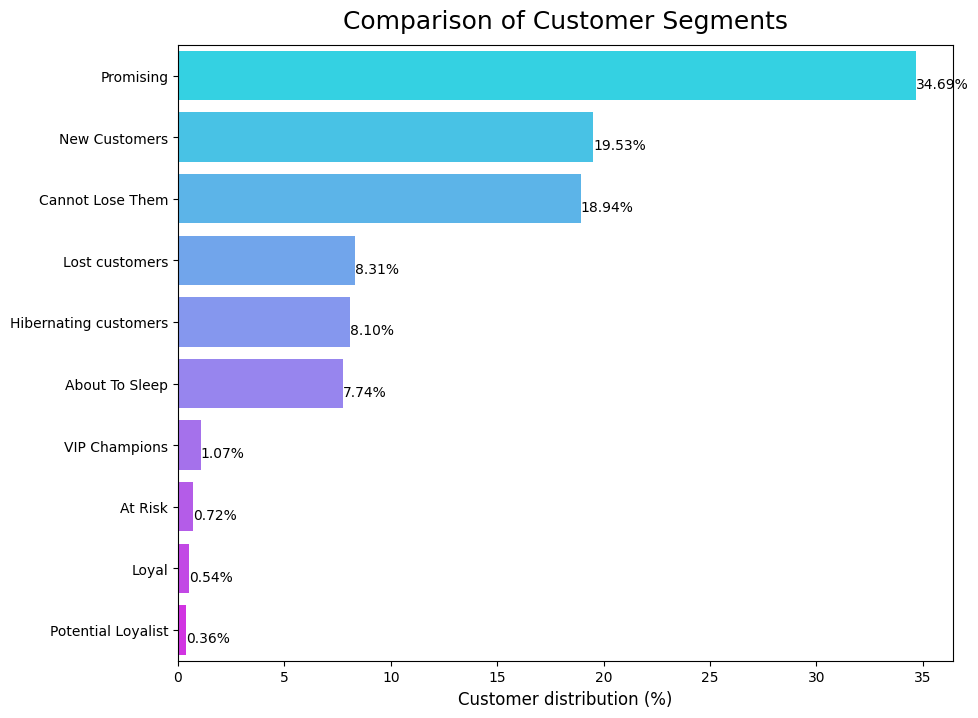

In [ ]:
#Vẽ biểu đồ
plt.figure(figsize = (10, 8))

# Calculate total customer per segment (%) into new column
data = (df_final['Segment'].value_counts(normalize=True)*100).reset_index(name = "percentage")
ax = sns.barplot(x = data['percentage'], y = data['Segment'], data = data, palette = "cool")

for i, v in enumerate(data['percentage']):
  ax.text(v, i+0.20, "{:.2f}".format(v)+"%", color = 'black', ha = 'left')

plt.ylabel(None)
plt.xlabel('Customer distribution (%)', fontdict = {'fontsize': 12})
plt.title('Comparison of Customer Segments', fontdict = {'fontsize': 18}, pad = 12)

plt.show()

In [ ]:
# 1. Nhóm khách hàng Best Customers có đặc điểm như thế nào? Số lượng? (1.5đ)
# 2. Đâu là các khách hàng rời bỏ? Số lượng? (1.5đ)
# 3. Nhóm khách hàng có khả năng Churned có đặc điểm như thế nào ? (1.5đ)


In [ ]:
# 1. Nhóm khách hàng Best Customers có đặc điểm như thế nào? Số lượng? (1.5đ)
best_customers = df_final[df_final['Segment'].isin(['VIP Champions', 'Loyal'])]

In [ ]:
best_customers_count = best_customers.shape[0]
print("Số lượng của nhóm best customer:", best_customers_count)

Số lượng của nhóm best customer: 1536


In [ ]:
print("Đặc điểm của nhóm best customer:")
print(best_customers.describe())

Đặc điểm của nhóm best customer:
           Recency    Frequency       Monetary  F_score
count  1536.000000  1536.000000    1536.000000   1536.0
mean    136.018229     2.158854   36517.030599      4.0
std      75.162094     0.643302   30292.664323      0.0
min       0.000000     2.000000   13331.000000      4.0
25%      72.000000     2.000000   19630.250000      4.0
50%     135.500000     2.000000   27158.500000      4.0
75%     199.000000     2.000000   41636.750000      4.0
max     272.000000    16.000000  465588.000000      4.0


In [ ]:
# nhóm khách hàng được xem là "Best Customers" là nhóm có
# Recency thấp, Frequency cao và Monetary cao.
# Đây là nhóm khách hàng có đóng góp lớn nhất vào doanh số và lợi nhuận của doanh nghiệp

# VIP Champions (Nhóm ưu tú): Đây là nhóm khách hàng mua hàng gần đây, mua hàng thường xuyên và chi tiêu nhiều nhất.
# Đây chính là nhóm khách hàng được xem là "Best Customers" vì đóng góp lớn vào doanh số và lợi nhuận của doanh nghiệp.

# Loyal (Nhóm trung thành): Đây là nhóm khách hàng cũng mua hàng thường xuyên và chi tiêu một số tiền đáng kể,
# nhưng có thể không mua hàng gần đây như nhóm "VIP Champions".
# Tuy nhiên, vì họ có tần suất mua hàng cao và chi tiêu đáng kể, họ cũng có thể được xem là "Best Customers" trong một phạm vi rộng hơn.

In [ ]:
# 2. Đâu là các khách hàng rời bỏ? Số lượng? (1.5đ)
churn_customers = df_final[df_final['Segment'].isin(['Lost customers', 'Hibernating customers'])]

In [ ]:
churn_customers_count = churn_customers.shape[0]
print("Số lượng của nhóm churn customer:", churn_customers_count)

Số lượng của nhóm churn customer: 15664


In [ ]:
print("Đặc điểm của nhóm churn customer:")
print(churn_customers.describe())

Đặc điểm của nhóm churn customer:
            Recency     Frequency      Monetary       F_score
count  15664.000000  15664.000000  15664.000000  15664.000000
mean     401.283197      1.000575   5573.120340      0.002043
std       93.818830      0.026495   1797.804901      0.090377
min      273.000000      1.000000   1007.000000      0.000000
25%      319.000000      1.000000   4076.750000      0.000000
50%      390.000000      1.000000   5649.000000      0.000000
75%      473.000000      1.000000   7115.000000      0.000000
max      728.000000      3.000000   8751.000000      4.000000


In [ ]:
# Giả thuyết về lý do churn
# Có thể giả định rằng nhóm churn customer đã không mua hàng trong một khoảng thời gian dài hoặc mua hàng ít và không chi tiêu nhiều tiền.
# Các lý do có thể là do sự cạnh tranh từ các đối thủ, sự không hài lòng về sản phẩm hoặc dịch vụ, hoặc lý do cá nhân khác.

In [ ]:
# 3. Nhóm khách hàng có khả năng Churned có đặc điểm như thế nào ? (1.5đ)

In [ ]:
# các nhóm còn lại: 'Promising','New Customers', 'Cannot Lose Them'

In [ ]:
probably_churn_customers = df_final[df_final['Segment'].isin(['About To Sleep', 'At Risk'])]

In [ ]:
probably_churn_customers_count = probably_churn_customers.shape[0]
print("Số lượng của nhóm probably churn customer:", probably_churn_customers_count)

Số lượng của nhóm probably churn customer: 8074


In [ ]:
print("Đặc điểm của nhóm probably churn customer:")
print(probably_churn_customers.describe())

Đặc điểm của nhóm probably churn customer:
           Recency    Frequency       Monetary      F_score
count  8074.000000  8074.000000    8074.000000  8074.000000
mean    279.425564     1.092271   10543.525886     0.340847
std      62.082245     0.317588   10671.041330     1.116856
min     182.000000     1.000000    3934.000000     0.000000
25%     227.000000     1.000000    7091.000000     0.000000
50%     278.000000     1.000000    9028.500000     0.000000
75%     326.750000     1.000000   11271.000000     0.000000
max     605.000000     6.000000  355999.000000     4.000000


In [ ]:
# Giả thuyết về lý do không quay trở lại mua hàng
# Có thể giả định rằng nhóm probably churn customer có thể không quay trở lại mua hàng vì họ đã mua ít sản phẩm, chi tiêu ít tiền, hoặc đã mua hàng lâu trước đó và không thể tiếp tục giữ được mức chi tiêu cao.
# Lý do khác có thể là do họ không nhận được sự chăm sóc hoặc ưu đãi đặc biệt từ cửa hàng, hoặc có thể họ không hài lòng với sản phẩm hoặc dịch vụ.

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Trả lời các Business Questions và thực hiện Exploratory Data Analysis để giúp Olist hiểu rõ hơn về
# nền tảng thương mại của mình và tối ưu hóa các cơ hội phát triển sẵn có, hãy trả lời các câu hỏi bên
# dưới:
# a. Tổng doanh thu mà Olist thu được là bao nhiêu và thay đổi như thế nào theo thời gian? (1,5đ)
# b. Có bao nhiêu đơn đặt hàng được đặt trên Olist và số lượng các đơn hàng thay đổi như thế nào
# theo tháng hoặc mùa? (1,5đ)
# c. Các danh mục sản phẩm phổ biến nhất trên Olist là gì và doanh số bán hàng của chúng khác
# nhau như thế nào? (1,5đ)
# d. Giá trị Average Order Value (AOV) trên Olist là bao nhiêu và giá trị này thay đổi như thế nào
# theo Product Category hoặc Payment Method? (1đ)

In [ ]:
# a. Tổng doanh thu mà Olist thu được và thay đổi theo thời gian
total_revenue = df_orders_customers_items['revenue'].sum()
print("Tổng doanh thu mà Olist thu được là:", total_revenue)

Tổng doanh thu mà Olist thu được là: 1584351530.0


In [ ]:
revenue_by_month = df_orders_customers_items.groupby(df_orders_customers_items['order_purchase_timestamp'].dt.to_period('M'))['revenue'].sum()

In [ ]:
print("Tổng doanh thu theo tháng:")
print(revenue_by_month)

Tổng doanh thu theo tháng:
order_purchase_timestamp
2016-09        35475.0
2016-10      5680884.0
2016-12         1962.0
2017-01     13718849.0
2017-02     28628062.0
2017-03     43204859.0
2017-04     41242224.0
2017-05     58619095.0
2017-06     50296304.0
2017-07     58497162.0
2017-08     66820460.0
2017-09     72039891.0
2017-10     76931237.0
2017-11    117910583.0
2017-12     86354723.0
2018-01    110730189.0
2018-02     98690896.0
2018-03    115512682.0
2018-04    115969804.0
2018-05    114978182.0
2018-06    102267711.0
2018-07    105872803.0
2018-08    100330847.0
2018-09        16646.0
Freq: M, Name: revenue, dtype: float64


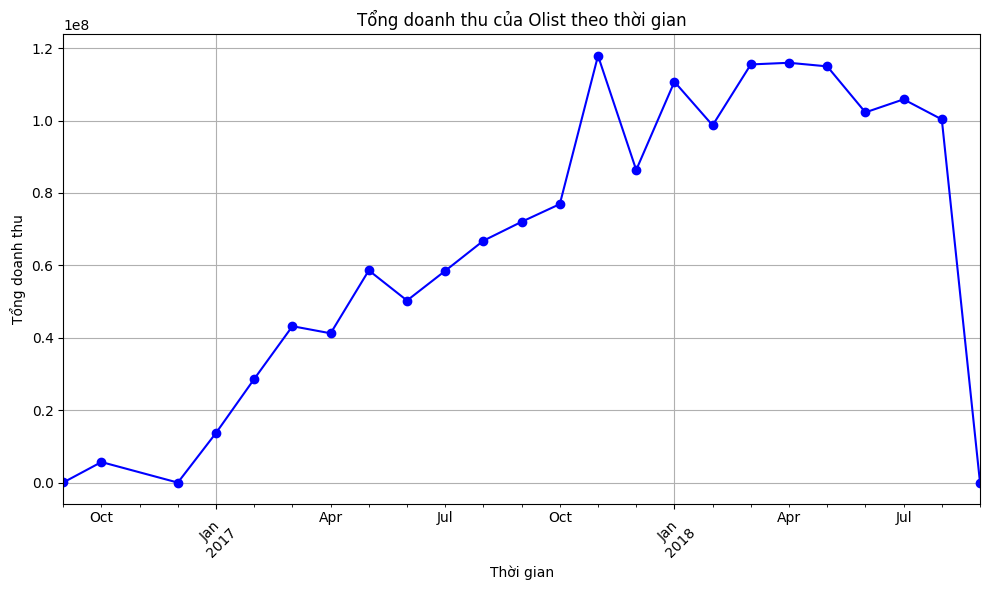

In [ ]:
#Vẽ biểu đồ
plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='line', marker='o', color='b')

plt.title('Tổng doanh thu của Olist theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Tổng doanh thu')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# b. Số lượng đơn đặt hàng và sự thay đổi theo thời gian
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M')
orders_per_month = df_orders['order_month'].value_counts().sort_index()
print("Số lượng đơn đặt hàng theo tháng:")
print(orders_per_month)

Số lượng đơn đặt hàng theo tháng:
order_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: count, dtype: int64


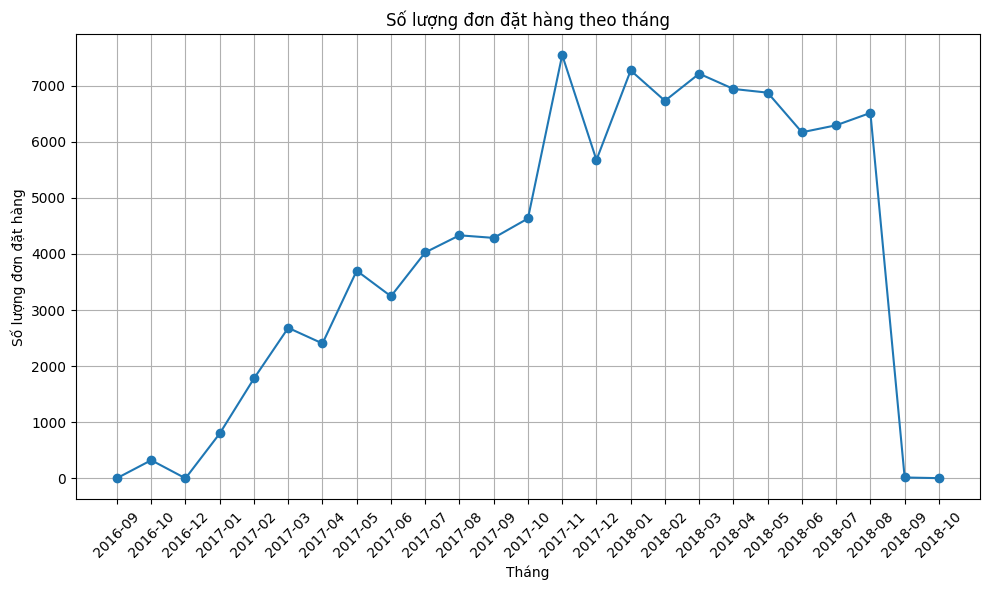

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(orders_per_month.index.astype(str), orders_per_month.values, marker='o', linestyle='-')

plt.xlabel('Tháng')
plt.ylabel('Số lượng đơn đặt hàng')
plt.title('Số lượng đơn đặt hàng theo tháng')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# c. Các danh mục sản phẩm phổ biến nhất và doanh số bán hàng của chúng


In [ ]:
# xử lý null
# nhận thấy có những product_id không thuộc product_category_name nào

In [ ]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df_products[df_products['product_category_name'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,None,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,None,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,None,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,None,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,None,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,None,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,None,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,None,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,None,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
df_products2= df_products.copy()

In [ ]:
df_products2['product_category_name'].isnull().sum()

610

In [ ]:
df_products2['product_category_name'] = df_products2['product_category_name'].fillna('other')

In [ ]:
df_products2.fillna(0, inplace=True)

In [ ]:
# merge lại

In [ ]:
df_items_product = pd.merge(df_order_items, df_products2, on='product_id')

In [ ]:
df_items_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   product_category_name       112650 non-null  object        
 8   product_name_lenght         112650 non-null  float64       
 9   product_description_lenght  112650 non-null  float64       
 10  product_photos_qty          112650 non-null  float64       
 11  product_weight_g            112650 non-

In [ ]:
df_items_product

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,5890.0,1329.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,5590.0,1796.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,6490.0,1833.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,5890.0,1617.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,5890.0,1329.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,12990.0,5120.0,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,9900.0,1352.0,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,73600.0,2091.0,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,22990.0,4402.0,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [ ]:
# Merge tiếp để dịch tên category ra tiếng Anh

In [ ]:
df_category_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
df_items_product_Eng = pd.merge(df_items_product, df_category_trans, on='product_category_name', how = 'left')

In [ ]:
df_items_product_Eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          112650 non-null  object        
 8   product_name_lenght            112650 non-null  float64       
 9   product_description_lenght     112650 non-null  float64       
 10  product_photos_qty             112650 non-null  float64       
 11  

In [ ]:
# lại xử lý null
df_items_product_Eng['product_category_name_english'].isnull().sum()

1627

In [ ]:
df_items_product_Eng['product_category_name_english'] = df_items_product_Eng['product_category_name_english'].fillna('other')

In [ ]:
df_items_product_Eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          112650 non-null  object        
 8   product_name_lenght            112650 non-null  float64       
 9   product_description_lenght     112650 non-null  float64       
 10  product_photos_qty             112650 non-null  float64       
 11  

In [ ]:
# tính revenue

In [ ]:
df_items_product_Eng['revenue'] = df_items_product['price'] + df_items_product['freight_value']

In [ ]:
print(df_items_product_Eng.duplicated(['order_id']).sum())

13984


In [ ]:
categories = df_items_product_Eng.groupby("product_category_name_english").agg(
    order_count=("order_id", "nunique"),#----------------------------------------------------------------------------------------------------
    total_revenue=("revenue", "sum")
).sort_values(by=["order_count", "total_revenue"], ascending=False)
print("Các danh mục sản phẩm phổ biến nhất và doanh số của chúng:")
print(categories.head(10))

Các danh mục sản phẩm phổ biến nhất và doanh số của chúng:
                               order_count  total_revenue
product_category_name_english                            
bed_bath_table                        9417    124168172.0
health_beauty                         8836    144124807.0
sports_leisure                        7720    115665648.0
computers_accessories                 6689    105927240.0
furniture_decor                       6449     90251179.0
housewares                            5884     77839777.0
watches_gifts                         5624    130554161.0
telephony                             4199     39488332.0
auto                                  3897     68538432.0
toys                                  3886     56137255.0


<ipython-input-270-86854fb0e59d>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



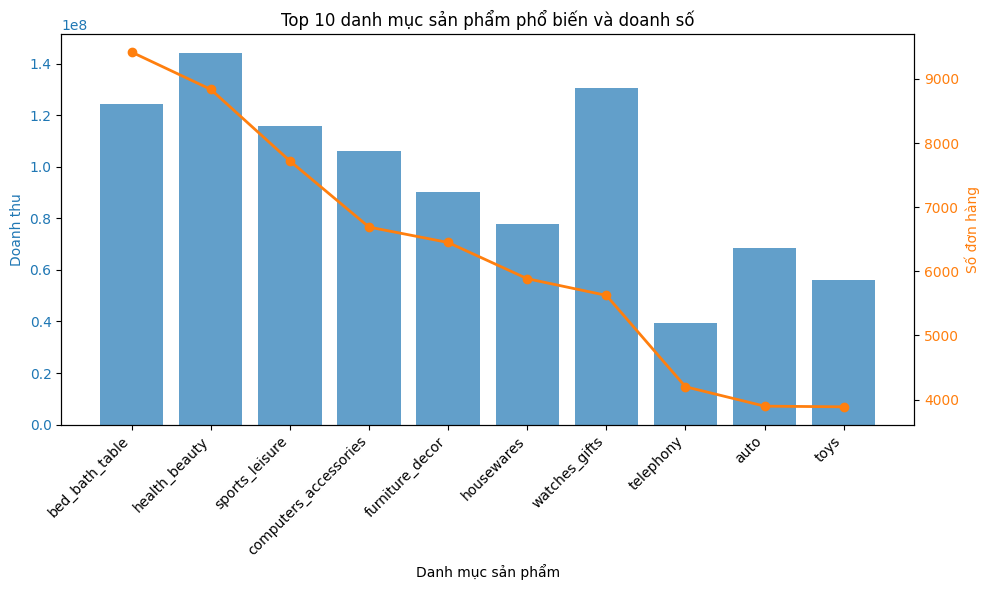

In [ ]:
top_categories = categories.head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Danh mục sản phẩm')
ax1.set_ylabel('Doanh thu', color=color)
ax1.bar(top_categories.index, top_categories["total_revenue"], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Số đơn hàng', color=color)
ax2.plot(top_categories.index, top_categories["order_count"], color=color, marker='o', linestyle='-', linewidth=2, label='Số đơn hàng')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 10 danh mục sản phẩm phổ biến và doanh số')
ax1.set_xticklabels(top_categories.index, rotation=45, ha='right')
fig.tight_layout()

plt.show()



In [ ]:
# d. Giá trị Average Order Value (AOV) và sự thay đổi theo Product Category hoặc Payment Method

In [ ]:
df_items_product_Eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          112650 non-null  object        
 8   product_name_lenght            112650 non-null  float64       
 9   product_description_lenght     112650 non-null  float64       
 10  product_photos_qty             112650 non-null  float64       
 11  

In [ ]:
# AOV = Tổng doanh thu / Số lượng đơn hàng

# AOV theo Product Category
aov_by_category = df_items_product_Eng.groupby('product_category_name_english')['revenue'].sum() / df_items_product_Eng.groupby('product_category_name_english')['order_id'].nunique()
print("AOV theo Product Category:")
print(aov_by_category)

AOV theo Product Category:
product_category_name_english
agro_industry_and_commerce    43062.675824
air_conditioning              24416.675889
art                           13984.064356
arts_and_craftmanship          9496.260870
audio                         16113.982857
                                  ...     
stationery                    12018.247945
tablets_printing_image        11081.784810
telephony                      9404.222910
toys                          14446.025476
watches_gifts                 23213.755512
Length: 72, dtype: float64


----------------------------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------